## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../Datasets/ab_test-sales_pipeline-2.csv')

df

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1
...,...,...,...
76322,B,0,1
76323,A,0,1
76324,B,0,1
76325,B,1,0


In [5]:
#Agrupamos los datos para obtener  el flujo de ventas
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()

total_count

,conversion,no conversion
test,,
A,4163,30576
B,4841,36747


In [6]:
#Proporcion
total_count['success rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])

total_count

,conversion,no conversion,success rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


In [16]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

In [7]:
#Test Permutación
all_measurements = df[['conversion', 'no conversion']]
value_counts = df['test'].value_counts()

value_counts

B    41588
A    34739
Name: test, dtype: int64

In [ ]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(100000):
    a = df.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [10]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,4092,30647,4912,36676
1,4062,30677,4942,36646
2,4087,30652,4917,36671
3,4030,30709,4974,36614
4,4199,30540,4805,36783
...,...,...,...,...
995,4098,30641,4906,36682
996,4103,30636,4901,36687
997,4117,30622,4887,36701
998,4060,30679,4944,36644


In [11]:
perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

In [12]:
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,4092,30647,4912,36676,0.117793,0.118111
1,4062,30677,4942,36646,0.116929,0.118832
2,4087,30652,4917,36671,0.117649,0.118231
3,4030,30709,4974,36614,0.116008,0.119602
4,4199,30540,4805,36783,0.120873,0.115538
...,...,...,...,...,...,...
995,4098,30641,4906,36682,0.117965,0.117967
996,4103,30636,4901,36687,0.118109,0.117846
997,4117,30622,4887,36701,0.118512,0.117510
998,4060,30679,4944,36644,0.116872,0.118880


In [13]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4092,30647,4912,36676,0.117793,0.118111,-0.002702
1,4062,30677,4942,36646,0.116929,0.118832,-0.016277
2,4087,30652,4917,36671,0.117649,0.118231,-0.004951
3,4030,30709,4974,36614,0.116008,0.119602,-0.030979
4,4199,30540,4805,36783,0.120873,0.115538,0.044134
...,...,...,...,...,...,...,...
995,4098,30641,4906,36682,0.117965,0.117967,-0.000011
996,4103,30636,4901,36687,0.118109,0.117846,0.002225
997,4117,30622,4887,36701,0.118512,0.117510,0.008459
998,4060,30679,4944,36644,0.116872,0.118880,-0.017189


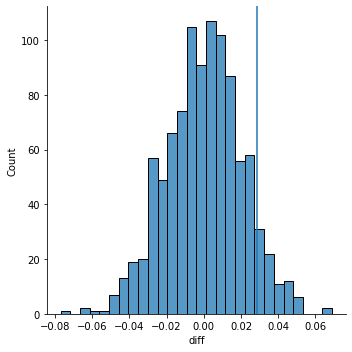

In [17]:
sns.displot(perm_results['diff']);

plt.axvline(diferencia_en_proporcion);

In [18]:
(perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0]

0.075